<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/New_MachinLearning/exam_06_classfication_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## iris 데이터를 사용한 이진분류기



In [57]:
#모듈 불러오기

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [58]:
iris = load_iris()
print(type(iris))
print('=============data shape============')
print('Data', iris.data.shape)
print('Label', iris.target.shape)
print('First five data', iris.data[0:5]) 
print('First five label', iris.target[0:5])  #라벨은 0, 1, 2로 있음 ='setosa' 'versicolor' 'virginica'
print('iris dataset leys\n', iris.keys())

<class 'sklearn.utils.Bunch'>
=============data shape============
Data (150, 4)
Label (150,)
First five data [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First five label [0 0 0 0 0]
iris dataset leys
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [59]:
print(iris.target_names)
#['setosa' 'versicolor' 'virginica'] = 품종이름

print(iris.feature_names)
#['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] =컬럼종류

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [60]:
#타켓, 피쳐 분류
x = iris.data
y = iris.target.reshape(-1, 1)  #설정된 행열에서 열을 1로 고정하고, 그외의 데이터를 아래행으로 나열 why? onehot인코딩을 위하여(데이터가 작아 데이터프레임을 만들지 않고 사용하기위해)
print(y[0:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [61]:
#y의 값이 범주형 데이터인데, 숫자가 크고 낮음에 판별을 두지 않기 위해 OneHotEncoder를 사용한다

encoder = OneHotEncoder(sparse=False)  #sparse=False > 희소행렬을 나타내지 않고 원본대로 출력한다
encoded_y = encoder.fit_transform(y)
print(encoded_y.shape)
print(encoded_y[:5])

(150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


희소행렬 = 0, 1, 2로 출력이 3개인데 원핫인코더로 1이 어디에 찍히는지 알 수 있다  

 (0, 0)	1.0  = 0행 0열이 1 (1, 0 ,0)  
 (1, 0)	1.0  = 1행 0열이 1 (1, 0 ,0)  
 (2, 0)	1.0  
 (3, 0)	1.0  
 (4, 0)	1.0 .. 이런식으로 앞()= 좌표를 나타냄

In [62]:
#데이터 분류하기

X_train, X_test, Y_train, Y_test = train_test_split(x, encoded_y, test_size=0.2)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 4) (120, 3)
(30, 4) (30, 3)


In [63]:
#모델 생성하기

model.add(Dense(256, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))  #마지막 Dense에서는 0,1,2의 분류기 수많큼 적으면 된다=3, 다중분류기에서는 마지막 레이어에 softmax를 쓴다 (총합1이되게)

In [64]:
#아담에 학습률 지정하기

opt = Adam(learning_rate=0.001)  #lr=learningrate(학습률) = 경사하강법으로 기울기가 최적으로 도달하기 위하여 거리 조정
model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])  #다중분류기에서는 categorayrical_crossentropy
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               1280      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 1539      
Total params: 101,763
Trainable params: 101,763
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
#모델 학습하기
fit_hist = model.fit(X_train, Y_train, batch_size=5, epochs=10, verbose=1)

Epoch 1/10
24/24 [==============================] - 1s 3ms/step - loss: 0.8304 - accuracy: 0.5833
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 0.3611 - accuracy: 0.8667
Epoch 3/10
24/24 [==============================] - 0s 3ms/step - loss: 0.3734 - accuracy: 0.8083
Epoch 4/10
24/24 [==============================] - 0s 3ms/step - loss: 0.2232 - accuracy: 0.9000
Epoch 5/10
24/24 [==============================] - 0s 3ms/step - loss: 0.1482 - accuracy: 0.9667
Epoch 6/10
24/24 [==============================] - 0s 3ms/step - loss: 0.1404 - accuracy: 0.9417
Epoch 7/10
24/24 [==============================] - 0s 4ms/step - loss: 0.1329 - accuracy: 0.9500
Epoch 8/10
24/24 [==============================] - 0s 4ms/step - loss: 0.1296 - accuracy: 0.9583
Epoch 9/10
24/24 [==============================] - 0s 3ms/step - loss: 0.1192 - accuracy: 0.9417
Epoch 10/10
24/24 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.9667


In [66]:
#test 예측결과 확인
score = model.evaluate(X_test, Y_test, verbose=1)
print('Final test set accuracy :', score[1])

1/1 [==============================] - 0s 149ms/step - loss: 0.0691 - accuracy: 0.9667
Final test set accuracy : 0.9666666388511658


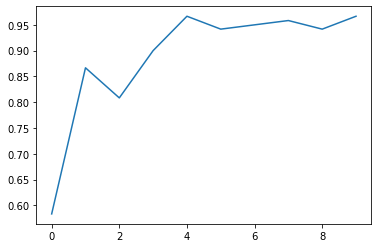

In [67]:
plt.plot(fit_hist.history['accuracy'])
plt.show()

In [68]:
labels= iris.target_names
my_sample = np.random.randint(30)  #결과확인을 위해 30개의 test중에 하나를 가져와 확인
sample = X_test[my_sample]
sample = sample.reshape(1, 4)  #안에 들어가있는 4개의 요소를 리스트데이터로 만들기 위해
pred = model.predict(sample)
print(pred)
print(Y_test[my_sample])
print('Target :', labels[np.argmax(Y_test[my_sample])])
print('Prediction after learning is :', labels[np.argmax(pred)])

[[9.996948e-01 3.051810e-04 5.250783e-10]]
[1. 0. 0.]
Target : setosa
Prediction after learning is : setosa
